<a href="https://colab.research.google.com/github/saitejameka/Machine-Learning/blob/master/stock_price_pred_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


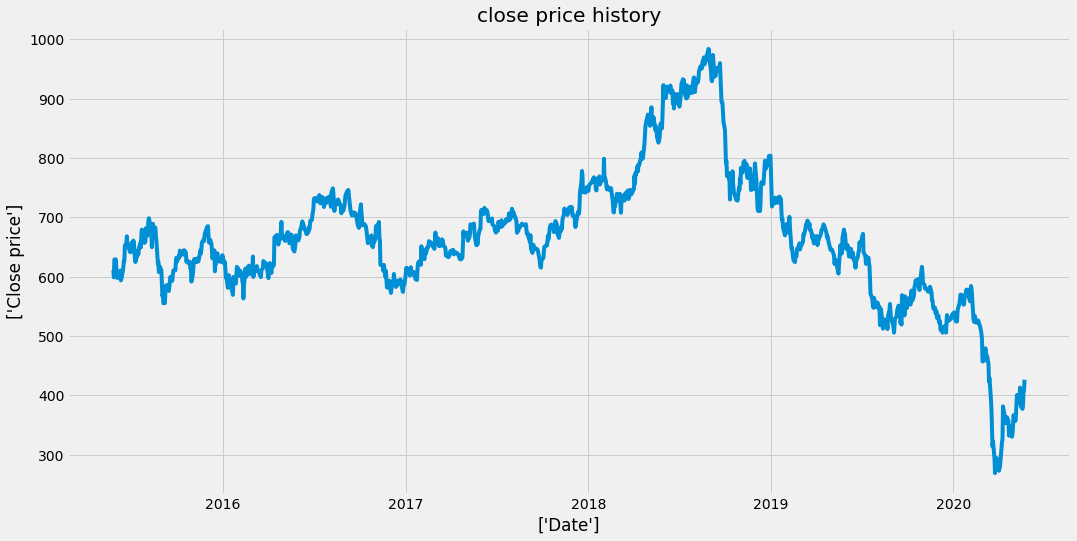

In [0]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


df = pdr.DataReader('M&M.NS', data_source='yahoo')

plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel(['Date'])
plt.ylabel(['Close price'])
plt.show()



In [0]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
print(dataset)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)
print('len of scaled data=',len(scaled_data[0]))
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

#LSTM expects the input to be 3 dimensional in the form of samples, no of features, no of timesteps

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=2, epochs=20)


test_data = scaled_data[training_data_len-60: , :]
X_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)#unscaling the values

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse




[[611.40002441]
 [599.07501221]
 [629.04998779]
 ...
 [405.04998779]
 [408.29998779]
 [426.3500061 ]]
[[0.47898166]
 [0.46174026]
 [0.5036721 ]
 ...
 [0.19031964]
 [0.19486605]
 [0.22011612]]
len of scaled data= 1
Epoch 1/20
922/922 [==============================] - 21s 23ms/step - loss: 0.0066
Epoch 2/20
922/922 [==============================] - 21s 23ms/step - loss: 0.0015
Epoch 3/20
922/922 [==============================] - 21s 23ms/step - loss: 0.0011
Epoch 4/20
922/922 [==============================] - 22s 24ms/step - loss: 9.1860e-04
Epoch 5/20
922/922 [==============================] - 22s 23ms/step - loss: 7.8909e-04
Epoch 6/20
922/922 [==============================] - 22s 23ms/step - loss: 5.9740e-04
Epoch 7/20
922/922 [==============================] - 21s 23ms/step - loss: 5.8206e-04
Epoch 8/20
922/922 [==============================] - 22s 24ms/step - loss: 5.2237e-04
Epoch 9/20
922/922 [==============================] - 21s 23ms/step - loss: 4.8694e-04
Epoch 10/20
922

2.764534214564732

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


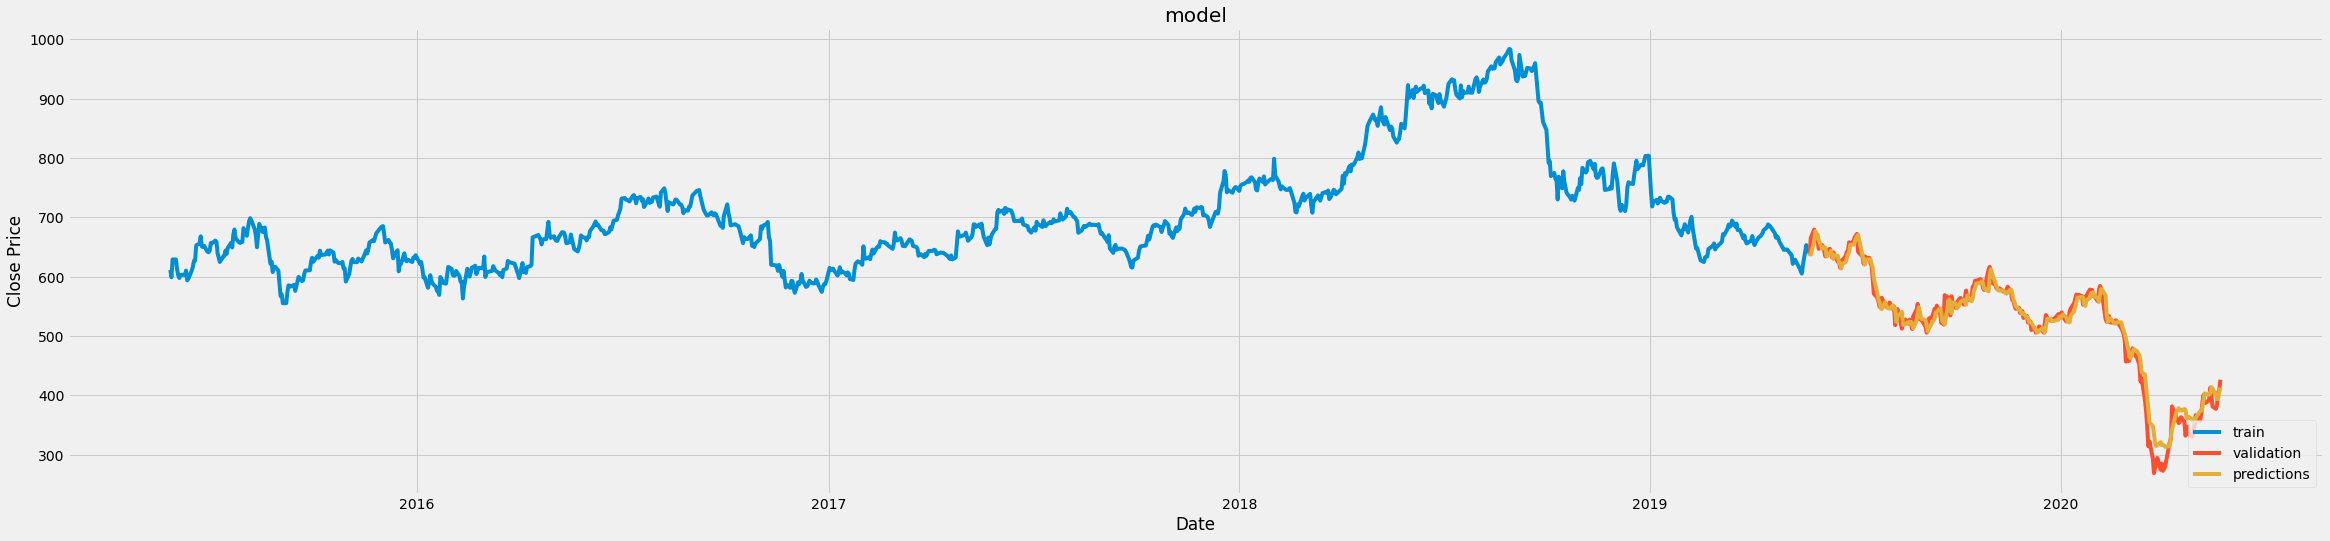

In [0]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(36, 8))
plt.title('model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'validation', 'predictions'], loc='lower right')
plt.show()


In [0]:
valid

,Close,predictions
Date,,
2019-05-22,640.549988,639.536743
2019-05-23,639.500000,638.198547
2019-05-24,665.450012,637.254822
2019-05-27,679.349976,659.696350
2019-05-28,670.549988,676.796875
...,...,...
2020-05-18,377.200012,400.775208
2020-05-19,382.899994,393.808624
2020-05-20,405.049988,394.088257


In [0]:
quote = pdr.DataReader('M&M.NS', data_source='yahoo')

new_df = quote.filter(['Close'])

last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

# actual_quote = pdr.DataReader('M&M.NS', data_source='yahoo')
# print(actual_quote)




[[425.49182]]
